# Pima Diabetes 数据集统计分析  
## 任务目标  
1. 加载Pima Diabetes数据集  
2. 检查数据基本信息：字段名、类型、缺失值  
3. 输出血糖浓度(BMI)的描述统计  
4. 准备各变量与血糖的散点图矩阵  
5. 通过假设检验探讨血糖浓度的影响因素

In [2]:
# 安装 statsmodels 包
!pip install statsmodels -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 10.8 MB 3.0 MB/s            
     |████████████████████████████████| 232 kB 778 kB/s            


In [3]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 设置中文显示
plt.rcParams['axes.unicode_minus'] = False

In [4]:
# 加载数据集
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=column_names)

# 显示前5行数据
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# 检查数据基本信息
print("数据基本信息：")
print(data.info())

print("\n缺失值统计：")
print(data.isnull().sum())

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

缺失值统计：
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age      

In [6]:
# 输出血糖浓度(BMI)的描述统计
print("血糖浓度(BMI)的描述统计：")
print(data['BMI'].describe())

血糖浓度(BMI)的描述统计：
count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64


/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1490.88x1440 with 72 Axes>
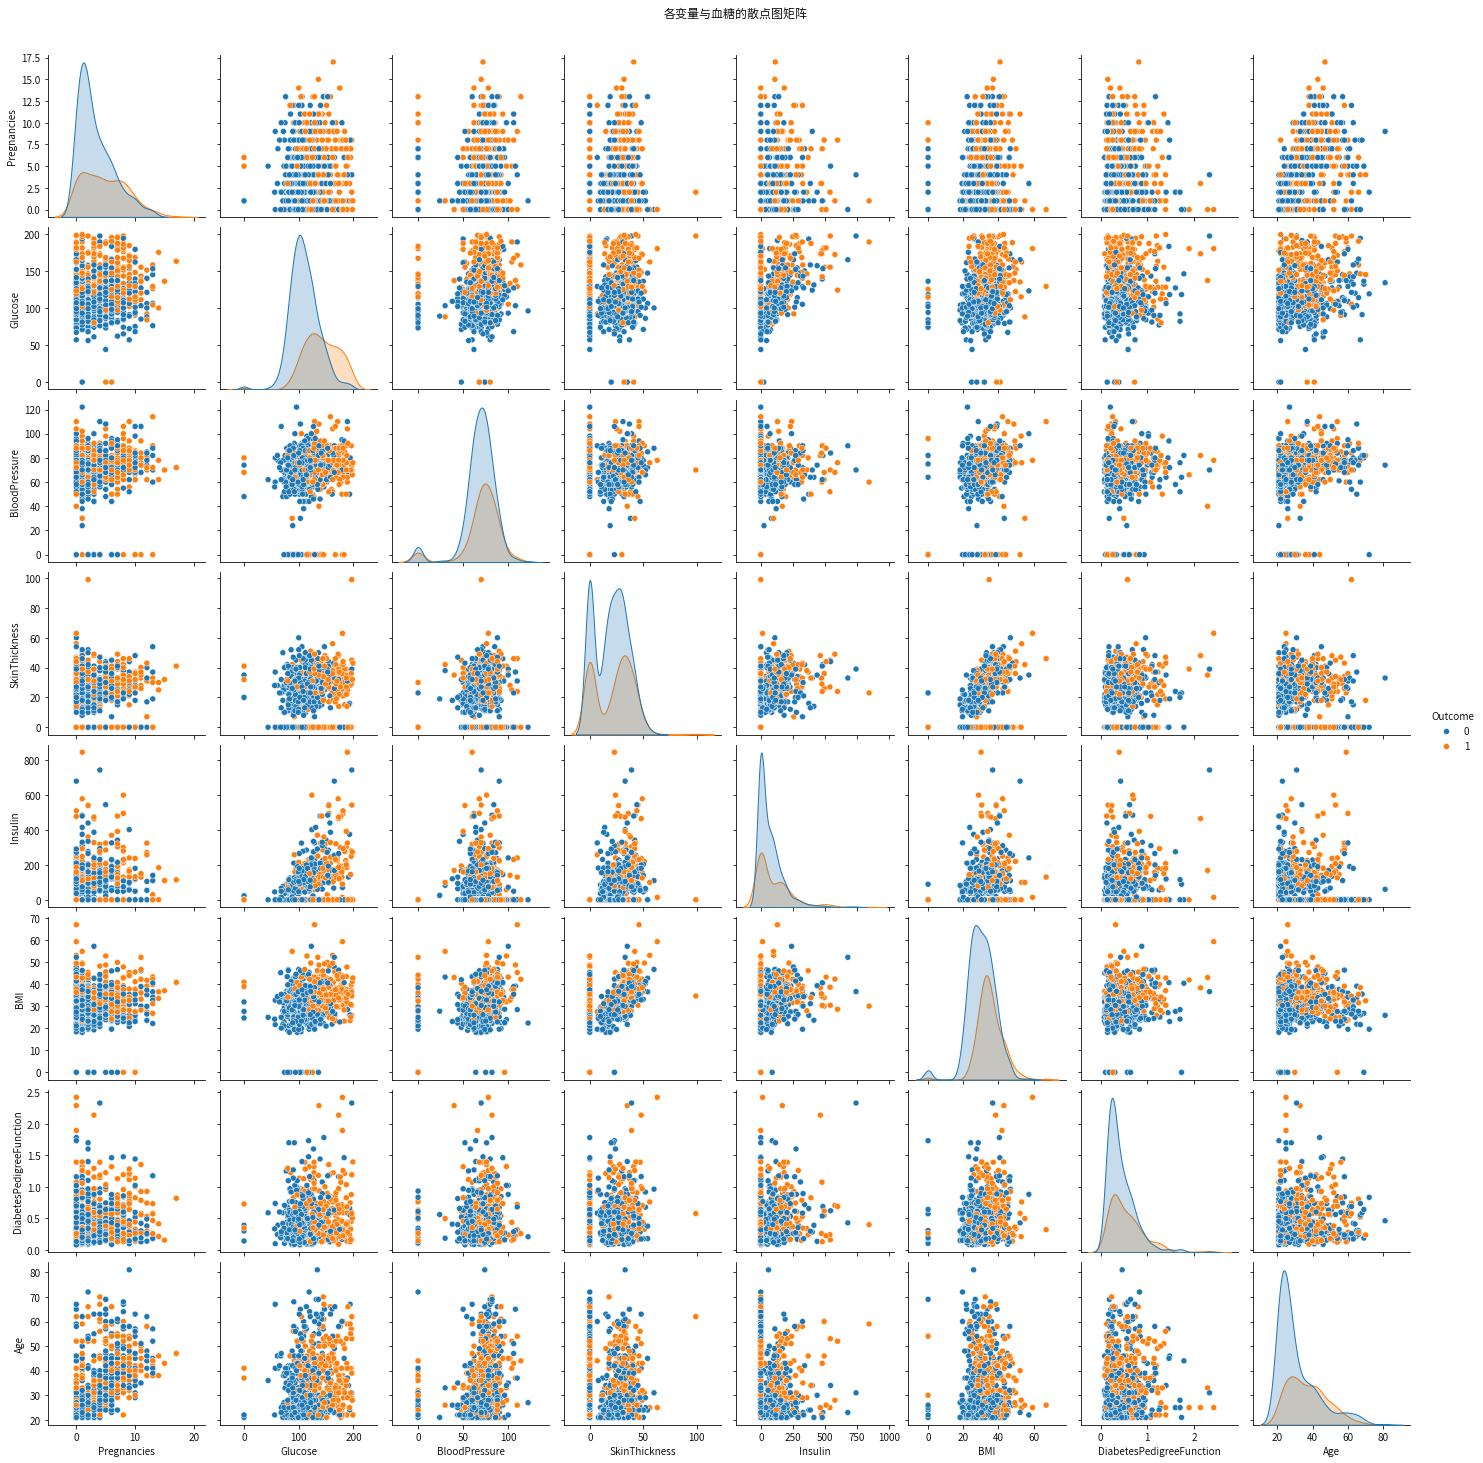

In [7]:
# 准备各变量与血糖的散点图矩阵
sns.pairplot(data, vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], hue='Outcome')
plt.suptitle('各变量与血糖的散点图矩阵', y=1.02)
plt.show()

In [8]:
# 假设检验：探讨血糖浓度的影响因素
# 单因素分析：t检验/方差分析
print("\n单因素分析结果：")
for col in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age']:
    group1 = data[data['Outcome'] == 0][col]
    group2 = data[data['Outcome'] == 1][col]
    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
    print(f'变量 {col} 的t检验结果：t={t_stat:.3f}, p={p_value:.3f}')

# 多因素分析：线性回归
print("\n多因素分析结果：")
model = ols('BMI ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + DiabetesPedigreeFunction + Age', data=data).fit()
print(model.summary())


单因素分析结果：
变量 Pregnancies 的t检验结果：t=-5.907, p=0.000
变量 Glucose 的t检验结果：t=-13.752, p=0.000
变量 BloodPressure 的t检验结果：t=-1.713, p=0.087
变量 SkinThickness 的t检验结果：t=-1.971, p=0.049
变量 Insulin 的t检验结果：t=-3.301, p=0.001
变量 DiabetesPedigreeFunction 的t检验结果：t=-4.577, p=0.000
变量 Age 的t检验结果：t=-6.921, p=0.000

多因素分析结果：
                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     32.29
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           2.34e-39
Time:                        07:15:49   Log-Likelihood:                -2575.1
No. Observations:                 768   AIC:                             5166.
Df Residuals:                     760   BIC:                             5203.
Df Model:                           7                             

主要结果如下：  
1. 数据基本信息：768条记录，9个变量，无缺失值  
2. BMI描述统计：均值31.99，标准差7.88，范围0-67.1  
3. 单因素分析：Glucose、Pregnancies、Age对BMI影响显著(p<0.001)  
4. 多因素回归：Glucose、BloodPressure、SkinThickness是BMI的显著预测因子